## About Dataset
## Context
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

## Acknowledgements
Insurance.csv file is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6.

## Inspiration
The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

In [1]:
# so let get all liaberies we required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## EDA And Cleaning

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
# Get information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Check with null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
#check with Duplicet values
data.duplicated().sum()

1

In [8]:
# remove duplicet values
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(1337, 7)

In [10]:
# Check with 5 Number summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [11]:
# WE have to saprate numerial columns and catiforical columns
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children', 'expenses'], dtype='object')


In [12]:
# check unique values of catigorical_features
for i in catigorical_features:
    print(i,data[i].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [13]:
for i in catigorical_features:
    print(i,data[i].value_counts())
    print("="*50)

sex sex
male      675
female    662
Name: count, dtype: int64
smoker smoker
no     1063
yes     274
Name: count, dtype: int64
region region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


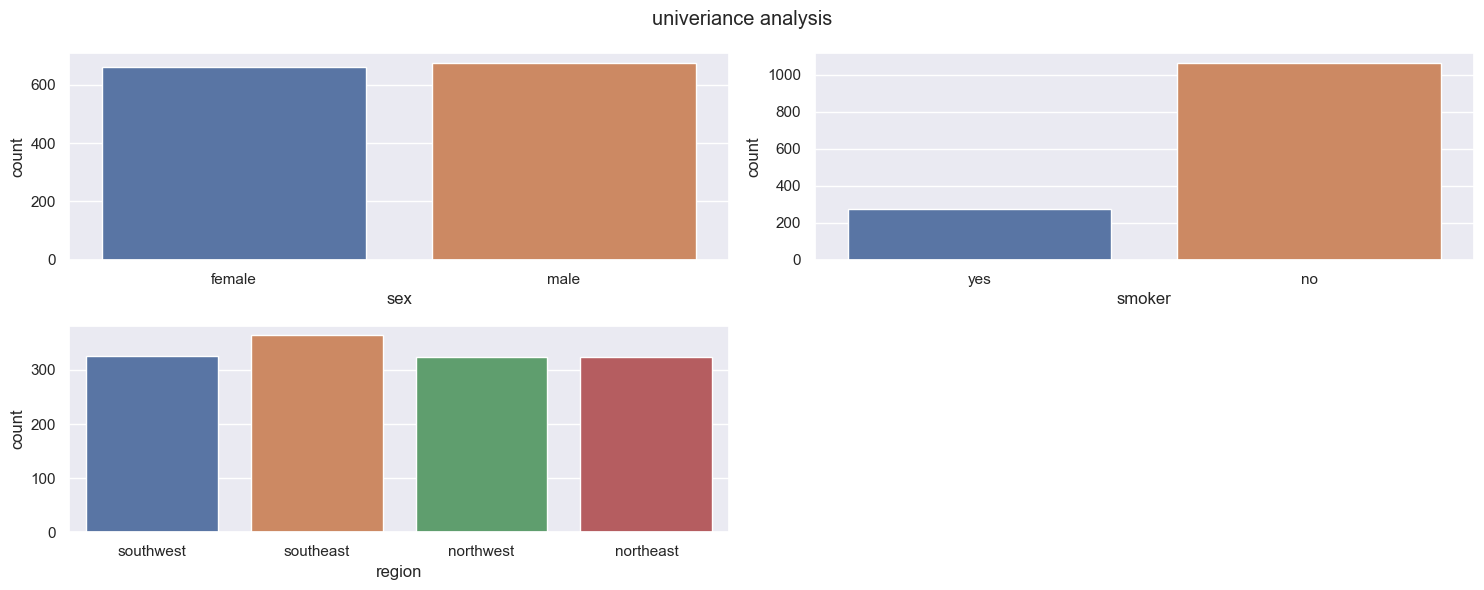

In [14]:
# univeriance analysis
try:
    plt.suptitle("univeriance analysis")
    for i in range(len(catigorical_features)):
        plt.subplot(2,2,i+1)
        sns.countplot(x=data[catigorical_features[i]])
        plt.tight_layout()
except Exception as e:
        print(e)
        

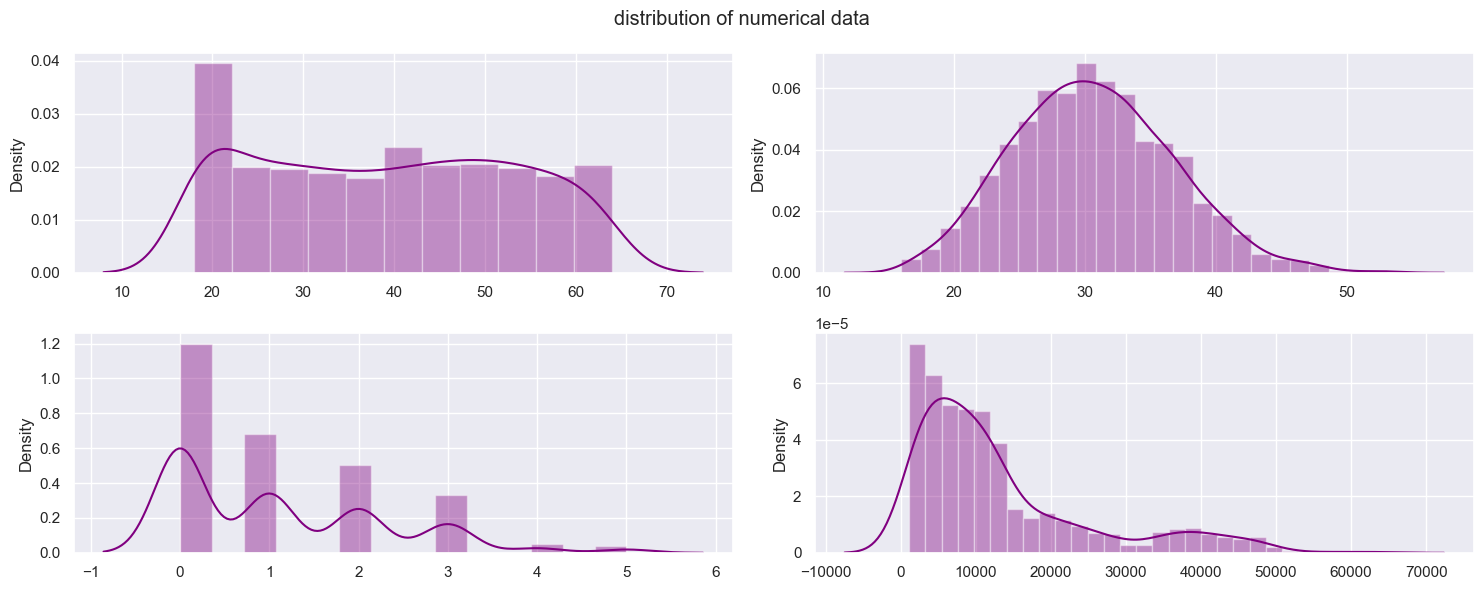

In [15]:
try:
    plt.suptitle("distribution of numerical data")
    for i in range(len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.distplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
        print(e)
        

<Axes: xlabel='expenses', ylabel='Density'>

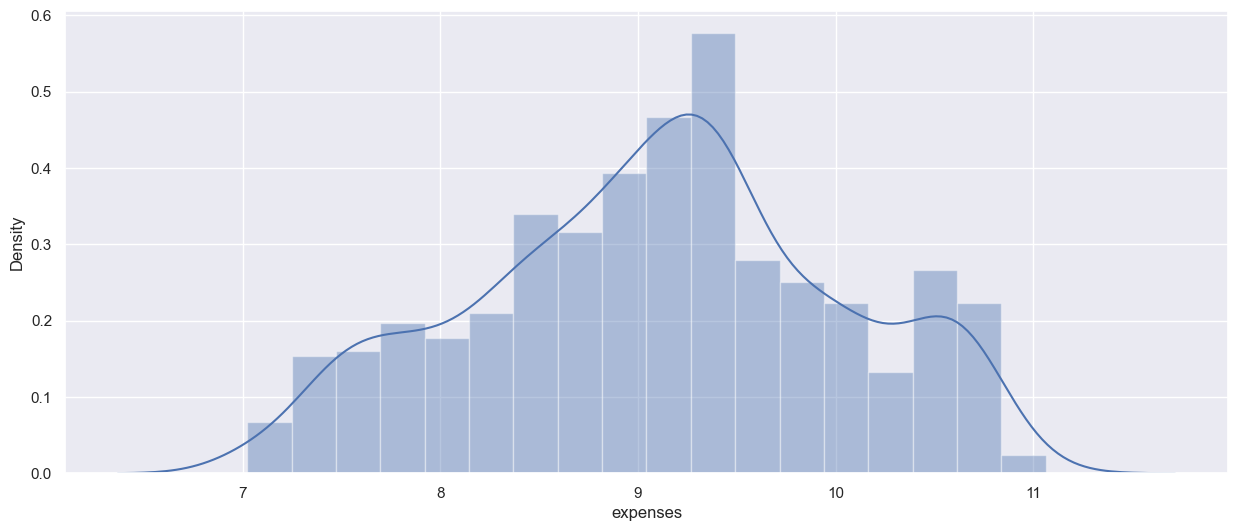

In [16]:
sns.distplot(np.log(data["expenses"]))

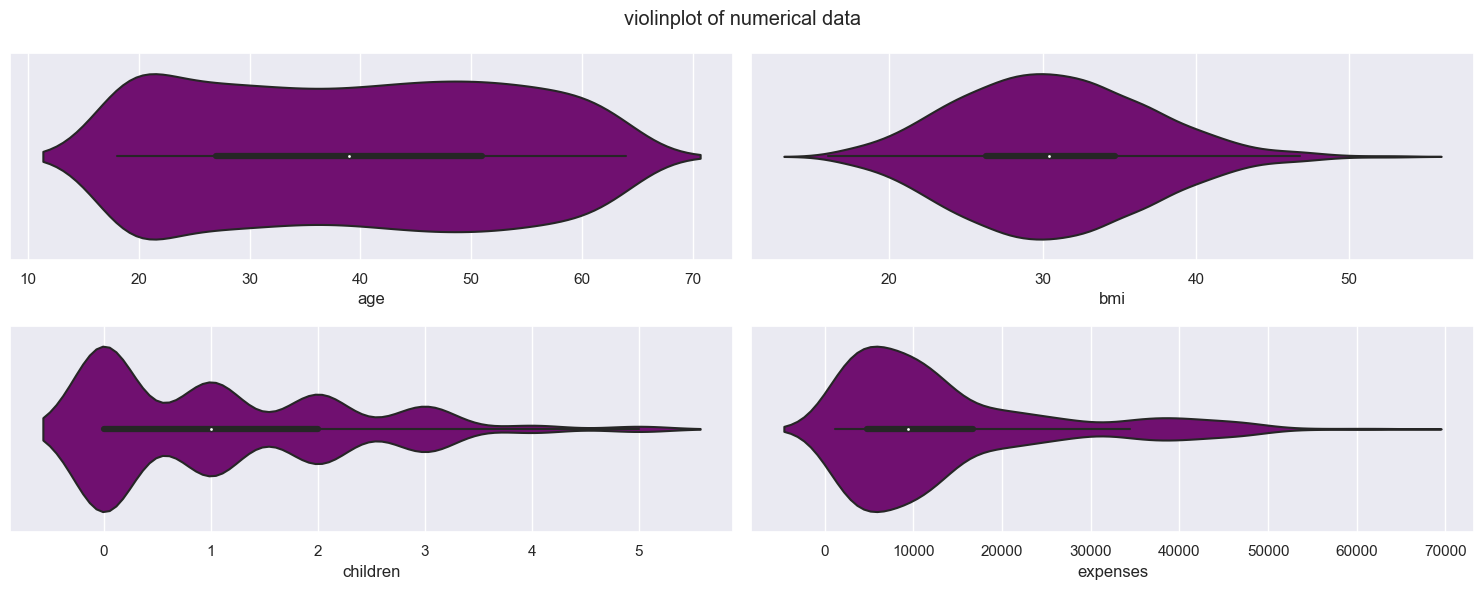

In [17]:
try:
    plt.suptitle("violinplot of numerical data")
    for i in range(len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.violinplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
        print(e)
        

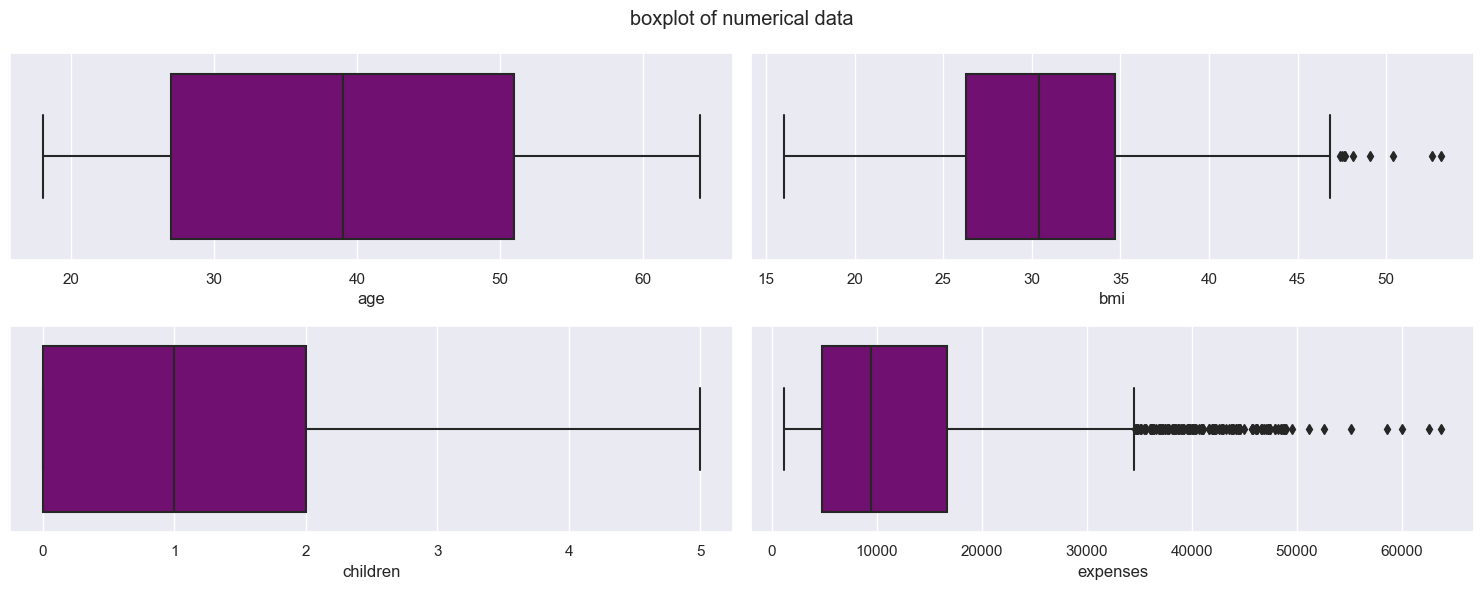

In [18]:
try:
    plt.suptitle("boxplot of numerical data")
    for i in range(len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
        print(e)
        

In [19]:
def remove_outliers_iqr(data, threshold=1.5):
    df = pd.DataFrame(data)
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    cleaned_data = df[(df >= lower_bound) & (df <= upper_bound)].dropna().values
    return cleaned_data

In [20]:
remove_outliers_iqr(data["expenses"]).shape

(1198, 1)

<Axes: title={'center': 'age and there expanses'}, xlabel='age', ylabel='expenses'>

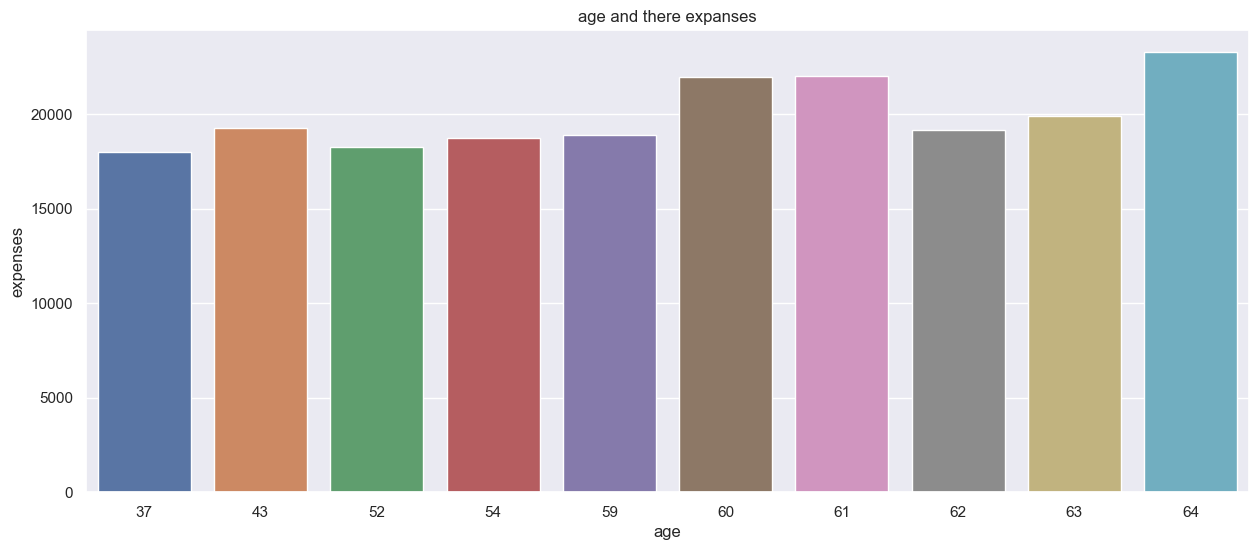

In [21]:
plt.title("age and there expanses")
age = data.groupby("age")["expenses"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x="age",y="expenses",data=age)

<Axes: title={'center': 'bmi and there expanses'}, xlabel='bmi', ylabel='expenses'>

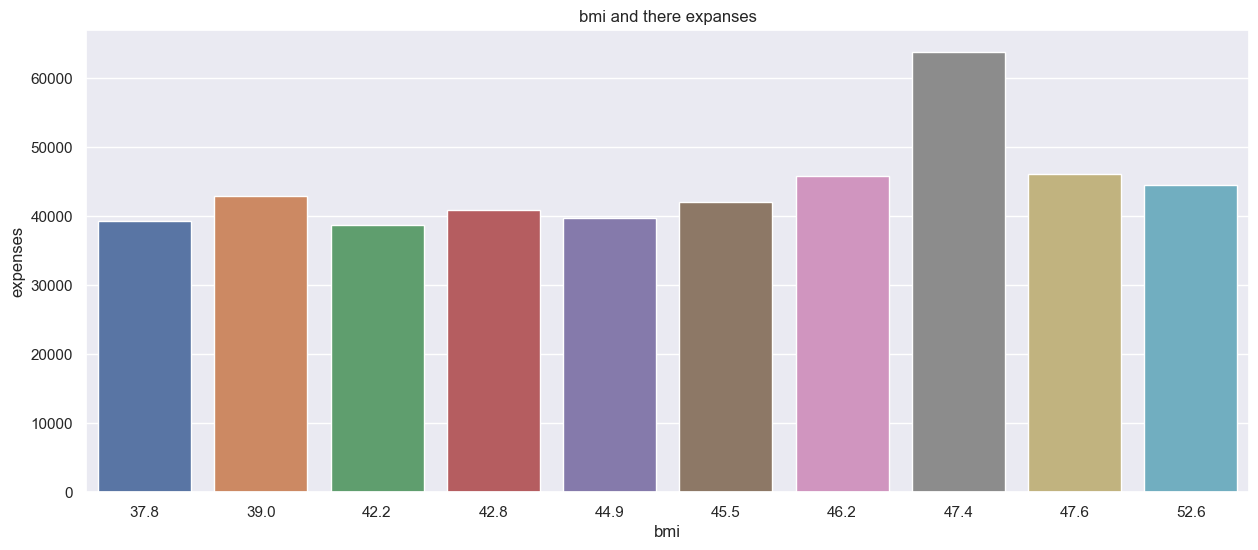

In [22]:
plt.title("bmi and there expanses")
bmi = data.groupby("bmi")["expenses"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x="bmi",y="expenses",data=bmi)

<Axes: title={'center': 'children and there expanses'}, xlabel='children', ylabel='expenses'>

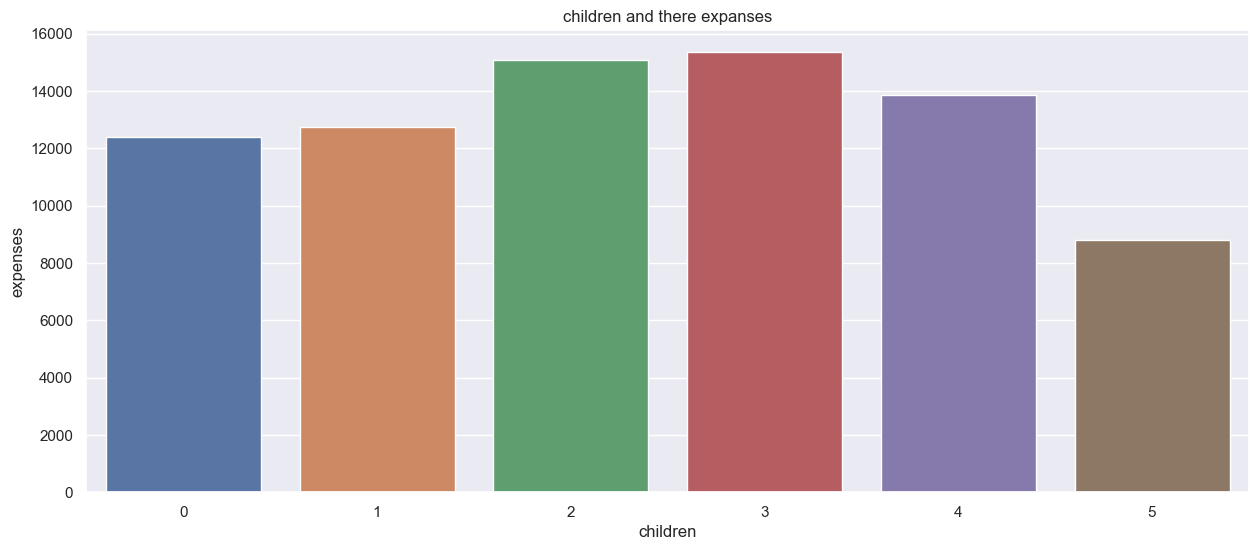

In [23]:
plt.title("children and there expanses")
children = data.groupby("children")["expenses"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x="children",y="expenses",data=children)

In [24]:
# encode the catigorical data to numerical data
data["sex"] = data["sex"].map({"female":0,"male":1})
data["smoker"] =data["smoker"].map({"no":0,"yes":1})

<Axes: title={'center': 'sex and there expanses'}, xlabel='sex', ylabel='expenses'>

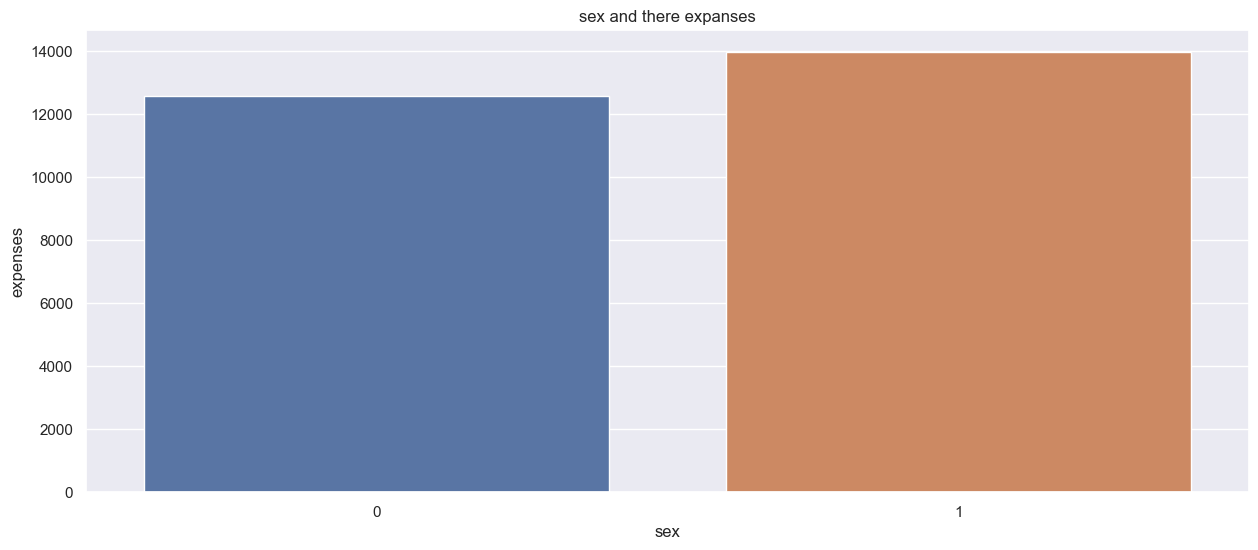

In [25]:
plt.title("sex and there expanses")
sex = data.groupby("sex")["expenses"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="sex",y="expenses",data=sex)

<Axes: title={'center': 'smokerand there expanses'}, xlabel='smoker', ylabel='expenses'>

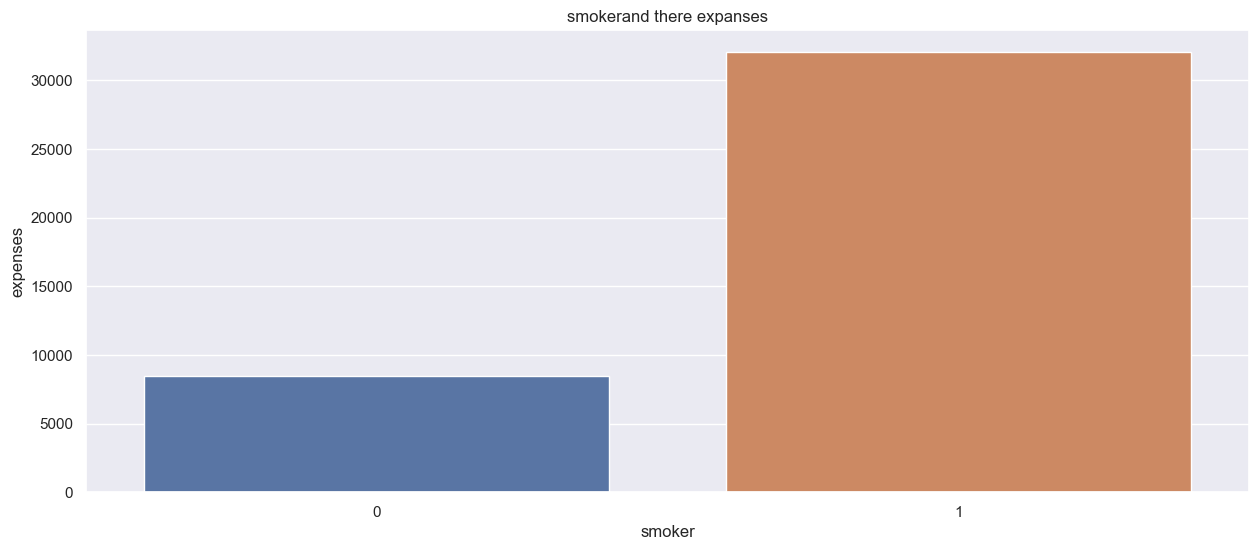

In [26]:
plt.title("smokerand there expanses")
smoker = data.groupby("smoker")["expenses"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="smoker",y="expenses",data=smoker)

In [27]:
# WE have to saprate numerial columns and catiforical columns
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['region'], dtype='object')
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'expenses'], dtype='object')


In [28]:
# # use label encoding on catigorical data to convert in to numerical
# from sklearn.preprocessing import LabelEncoder
# lable = LabelEncoder()

# for i in catigorical_features:
#      data[i] = lable.fit_transform(data[i])

In [29]:
# sns.heatmap(data.corr(),annot=True)

## Model Trainng 

In [30]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55
1334,18,0,31.9,0,0,northeast,2205.98
1335,18,0,36.9,0,0,southeast,1629.83
1336,21,0,25.8,0,0,southwest,2007.95


In [31]:
data.shape

(1337, 7)

In [32]:
# save data for modular coding to create web page
data.to_csv("insurance_clean.csv",index=False)

In [33]:
x = data.drop('expenses',axis=1)
y =data['expenses']

In [34]:
# WE have to saprate numerial columns and catiforical columns
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['region'], dtype='object')
Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [36]:
## Create Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler()),
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore")),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

# Create Preprocessor Object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [37]:
## Train TEst Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


In [39]:
# apply Pre Processor Object TO preprocess all features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test,predict)
    r2score = r2_score(test,predict)
    return mse,rmse,mae,r2score

In [42]:
# Multipal Model Traning
models =  {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "ElasticNet":ElasticNet(),
    "RandomForestRegressor":RandomForestRegressor(random_state=3)
}

traning_score = []
model_list = []
r2_list = []
y_pred_list = []

for i in range(len(list(models))):
    model  = list(models.values())[i]
#     train Model
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    
    # Make Prediction
    y_pradict = model.predict(X_test)
    
    mse,mae,rmse,r2score = model_evalution(y_test,y_pradict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    # matrix performance
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2score*100)
    print("="*40)
    
    r2_list.append(r2score*100)
    y_pred_list.append(y_pradict)
    traning_score.append(score)

LinearRegression
Model Traning Performance
MSE 3535662545.840559
MAE 594614.3746867005
RMSE 423271.43656716414
R2 80.75893452288115
Ridge
Model Traning Performance
MSE 3551549409.370087
MAE 595948.7737524163
RMSE 417983.0484840474
R2 80.67247825692407
Lasso
Model Traning Performance
MSE 3548853293.5687304
MAE 595722.5271524261
RMSE 417747.2693600179
R2 80.68715051141533
ElasticNet
Model Traning Performance
MSE 6057074372.240995
MAE 778272.0843150547
RMSE 552117.3909754847
R2 67.03741856440077
RandomForestRegressor
Model Traning Performance
MSE 2131000741.8157299
MAE 461627.63585120527
RMSE 251311.61779850742
R2 88.40310004887148


Text(0, 0.5, 'Predictions')

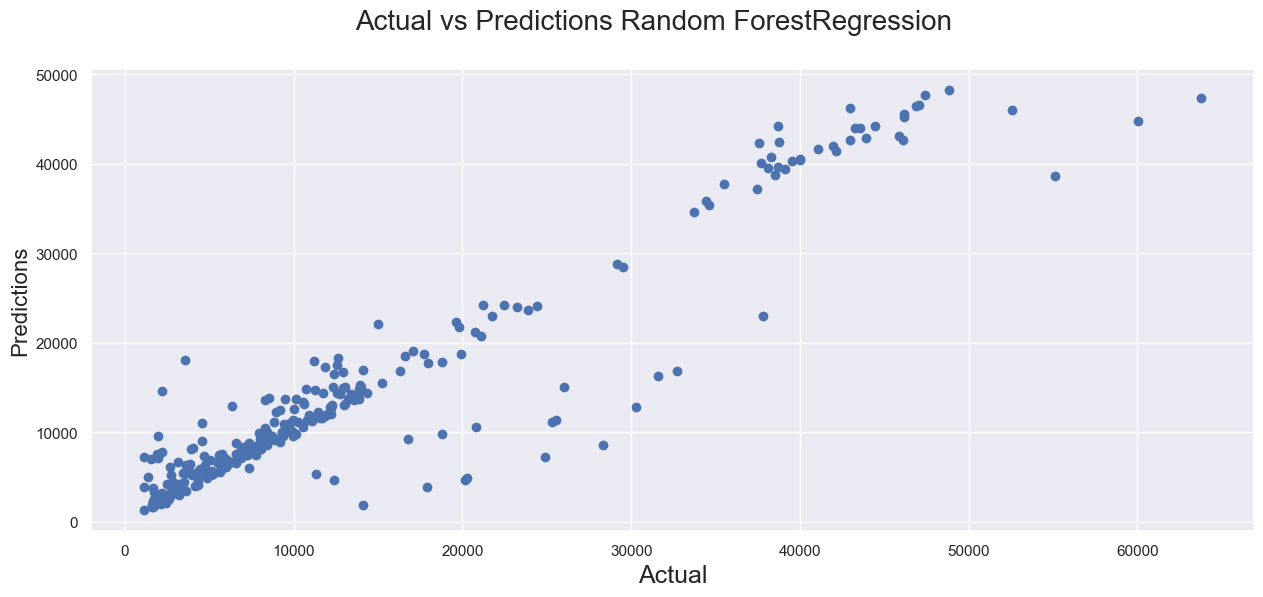

In [43]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_list[4])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [45]:
y_test[:20]

900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
481      9304.70
240     38511.63
277      2150.47
415      7345.73
707     10264.44
370     13415.04
331     24393.62
1249    37607.53
895     13063.88
637     24915.05
497      8027.97
210      1980.07
49      38709.18
737      3484.33
76       3947.41
Name: expenses, dtype: float64

In [51]:
y_pred_list[4][:20]

array([ 9609.8511,  6906.8066, 12066.3994, 42408.7923,  5958.2954,
       10007.0436, 38806.9929,  2378.4402,  8797.7183, 11209.5484,
       14272.7845, 24109.3056, 42383.0037, 15028.9773,  7236.3324,
        9315.4343,  9596.103 , 39665.929 ,  4505.3756,  5246.2004])

## Done